In [246]:
# Import needed packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics

In [247]:
# Import merged basis

file_to_load=os.path.join("book_data.csv")

books_df=pd.read_csv(file_to_load)
books_df

,isbn,series,language,publisher,price,title,subtitle,authors,categories,published_year,average_rating,num_pages,ratings_count
0,9.780439e+12,Harry Potter #5,English,Scholastic Inc.,7.38,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,2015.0,4.49,870,1996446
1,9.780316e+12,The Twilight Saga #1,English,"Little, Brown and Company",2.10,Twilight,NaN,Stephenie Meyer,Young Adult Fiction,2006.0,3.59,498,4367341
2,9.780346e+12,The Lord of the Rings #0-3,English,Ballantine Books,21.15,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,2012.0,4.59,1728,97731
3,9.780394e+12,NaN,English,Norton,2.73,Wuthering Heights,"The 1847 Text, Backgrounds and Contexts, Criti...",Emily Bronte;Emily Brontë,Fiction,2003.0,3.84,464,1041597
4,9.780142e+12,NaN,English,Penguin,5.46,Jane Eyre,NaN,Charlotte Brontë,Fiction,2003.0,4.11,532,1328143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,9.780442e+12,Apprentice Adept #5,English,Ace Books,3.89,Robot Adept,NaN,Piers Anthony,Fiction,1989.0,3.78,341,6092
1965,9.780811e+12,NaN,English,New Directions,3.59,In Search of Duende,NaN,Federico García Lorca;Norman Thomas Di Giovanni,Poetry,1998.0,4.30,99,599
1966,9.780554e+12,The Gap Cycle #3,English,Spectra,3.12,A Dark and Hungry God Arises,The Gap Into Power,Stephen R. Donaldson,Fiction,1993.0,4.08,518,5356
1967,9.781400e+12,NaN,English,Knopf,3.59,Imperial Life in the Emerald City,Inside Iraq's Green Zone,Rajiv Chandrasekaran,History,2006.0,4.02,320,4455


In [248]:
books_df.count()

isbn              1969
series             773
language          1967
publisher         1962
price             1969
title             1969
subtitle           577
authors           1953
categories        1953
published_year    1968
average_rating    1969
num_pages         1969
ratings_count     1969
dtype: int64

In [249]:
books_df.dtypes

isbn              float64
series             object
language           object
publisher          object
price             float64
title              object
subtitle           object
authors            object
categories         object
published_year    float64
average_rating    float64
num_pages           int64
ratings_count       int64
dtype: object

In [250]:
# We have a few categorical columns that will need some work to be used such as series, publisher, and categories. 
# Note also that ISBN is per nature an integer number, thus, column must be updated accordingly.

Data Cleaning Section

In [251]:
# 1- Update ISBN type from Float to Integer

books_df["isbn"]=books_df["isbn"].astype('int64')
books_df.dtypes

isbn                int64
series             object
language           object
publisher          object
price             float64
title              object
subtitle           object
authors            object
categories         object
published_year    float64
average_rating    float64
num_pages           int64
ratings_count       int64
dtype: object

In [252]:
# 2- Create categorical variable from Language: 1 = English / 0= Other

books_df.loc[books_df['language'].str.contains('English',na=False),'Language_Dummy']='English'
books_df.loc[~books_df['language'].str.contains('English',na=False),'Language_Dummy']='Other'

books_df.reset_index(inplace=True, drop=True)
books_df.head()

,isbn,series,language,publisher,price,title,subtitle,authors,categories,published_year,average_rating,num_pages,ratings_count,Language_Dummy
0,9780439358071,Harry Potter #5,English,Scholastic Inc.,7.38,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,2015.0,4.49,870,1996446,English
1,9780316015844,The Twilight Saga #1,English,"Little, Brown and Company",2.10,Twilight,NaN,Stephenie Meyer,Young Adult Fiction,2006.0,3.59,498,4367341,English
2,9780345538376,The Lord of the Rings #0-3,English,Ballantine Books,21.15,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,2012.0,4.59,1728,97731,English
3,9780393978896,NaN,English,Norton,2.73,Wuthering Heights,"The 1847 Text, Backgrounds and Contexts, Criti...",Emily Bronte;Emily Brontë,Fiction,2003.0,3.84,464,1041597,English
4,9780142437209,NaN,English,Penguin,5.46,Jane Eyre,NaN,Charlotte Brontë,Fiction,2003.0,4.11,532,1328143,English


In [253]:
# 3. Create a dicotomical variable from publishers split by quartiles: 
# Top = Over third quartile and Other the rest (proxy of publishers's size)


# Create Data frame to host unique publishers and count
# Get third Quartile that will be used to split the Publishers:
# Num Publications > 3rd Quartile => Big Size Publisher
# Num Publications <= 3rd Quartile => Other

Publishers_Series=books_df.publisher.value_counts()
Publishers_df = pd.DataFrame({'publisher':Publishers_Series.index,'count':Publishers_Series.values})
q=Publishers_Series.quantile(.75)

Publishers_df.loc[Publishers_df['count'] >= q, 'Size_Dummy']="Big"
Publishers_df.loc[Publishers_df['count'] < q, 'Size_Dummy']="Other"
Publishers_df=Publishers_df.drop(columns=['count'])


# Move the Dummy Variable to main Data Frame

books_df=pd.merge(books_df,Publishers_df,how="left",on='publisher')
books_df

,isbn,series,language,publisher,price,title,subtitle,authors,categories,published_year,average_rating,num_pages,ratings_count,Language_Dummy,Size_Dummy
0,9780439358071,Harry Potter #5,English,Scholastic Inc.,7.38,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,2015.0,4.49,870,1996446,English,Big
1,9780316015844,The Twilight Saga #1,English,"Little, Brown and Company",2.10,Twilight,NaN,Stephenie Meyer,Young Adult Fiction,2006.0,3.59,498,4367341,English,Big
2,9780345538376,The Lord of the Rings #0-3,English,Ballantine Books,21.15,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,2012.0,4.59,1728,97731,English,Big
3,9780393978896,NaN,English,Norton,2.73,Wuthering Heights,"The 1847 Text, Backgrounds and Contexts, Criti...",Emily Bronte;Emily Brontë,Fiction,2003.0,3.84,464,1041597,English,Big
4,9780142437209,NaN,English,Penguin,5.46,Jane Eyre,NaN,Charlotte Brontë,Fiction,2003.0,4.11,532,1328143,English,Big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,9780441731183,Apprentice Adept #5,English,Ace Books,3.89,Robot Adept,NaN,Piers Anthony,Fiction,1989.0,3.78,341,6092,English,Big
1965,9780811213769,NaN,English,New Directions,3.59,In Search of Duende,NaN,Federico García Lorca;Norman Thomas Di Giovanni,Poetry,1998.0,4.30,99,599,English,Big
1966,9780553562606,The Gap Cycle #3,English,Spectra,3.12,A Dark and Hungry God Arises,The Gap Into Power,Stephen R. Donaldson,Fiction,1993.0,4.08,518,5356,English,Big
1967,9781400044870,NaN,English,Knopf,3.59,Imperial Life in the Emerald City,Inside Iraq's Green Zone,Rajiv Chandrasekaran,History,2006.0,4.02,320,4455,English,Big


In [254]:
# 4. Treat Authors similar to publishers
# Top = Over third quartile and Other the rest (proxy of publishers's size)


# Create Data frame to host unique authors and count
# Get third Quartile that will be used to split the Authors:
# Rating Counts > 3rd Quartile => Famous Author
# Rating Counts <= 3rd Quartile => Other

Authors_Series=books_df.authors.value_counts()
Authors_df = pd.DataFrame({'authors':Authors_Series.index,'count':Authors_Series.values})
p=Authors_Series.quantile(.75)

Authors_df.loc[Authors_df['count'] >= p, 'Famous_Dummy']="Famous"
Authors_df.loc[Authors_df['count'] < p, 'Famous_Dummy']="Other"
Authors_df=Authors_df.drop(columns=['count'])

# Move the Dummy Variable to main Data Frame

books_df=pd.merge(books_df,Authors_df,how="left",on='authors')
books_df

,isbn,series,language,publisher,price,title,subtitle,authors,categories,published_year,average_rating,num_pages,ratings_count,Language_Dummy,Size_Dummy,Famous_Dummy
0,9780439358071,Harry Potter #5,English,Scholastic Inc.,7.38,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,2015.0,4.49,870,1996446,English,Big,Famous
1,9780316015844,The Twilight Saga #1,English,"Little, Brown and Company",2.10,Twilight,NaN,Stephenie Meyer,Young Adult Fiction,2006.0,3.59,498,4367341,English,Big,Other
2,9780345538376,The Lord of the Rings #0-3,English,Ballantine Books,21.15,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,2012.0,4.59,1728,97731,English,Big,Famous
3,9780393978896,NaN,English,Norton,2.73,Wuthering Heights,"The 1847 Text, Backgrounds and Contexts, Criti...",Emily Bronte;Emily Brontë,Fiction,2003.0,3.84,464,1041597,English,Big,Other
4,9780142437209,NaN,English,Penguin,5.46,Jane Eyre,NaN,Charlotte Brontë,Fiction,2003.0,4.11,532,1328143,English,Big,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,9780441731183,Apprentice Adept #5,English,Ace Books,3.89,Robot Adept,NaN,Piers Anthony,Fiction,1989.0,3.78,341,6092,English,Big,Famous
1965,9780811213769,NaN,English,New Directions,3.59,In Search of Duende,NaN,Federico García Lorca;Norman Thomas Di Giovanni,Poetry,1998.0,4.30,99,599,English,Big,Other
1966,9780553562606,The Gap Cycle #3,English,Spectra,3.12,A Dark and Hungry God Arises,The Gap Into Power,Stephen R. Donaldson,Fiction,1993.0,4.08,518,5356,English,Big,Other
1967,9781400044870,NaN,English,Knopf,3.59,Imperial Life in the Emerald City,Inside Iraq's Green Zone,Rajiv Chandrasekaran,History,2006.0,4.02,320,4455,English,Big,Other


In [255]:
# 6. Split categories from Fiction to Religion as independent categories, the rest as Others.

Categories_Series=books_df.categories.value_counts()
Categories_df = pd.DataFrame({'categories':Categories_Series.index,'count':Categories_Series.values})
c=sum(pd.isnull(books_df['categories']))

Categories_df.loc[Categories_df['count'] >= c, 'Categories_Dummy']="Top_Category"
Categories_df.loc[Categories_df['count'] < c, 'Categories_Dummy']="Other"
Categories_df=Categories_df.drop(columns=['count'])

# Move the Dummy Variable to main Data Frame

books_df=pd.merge(books_df,Categories_df,how="left",on='categories')
books_df


,isbn,series,language,publisher,price,title,subtitle,authors,categories,published_year,average_rating,num_pages,ratings_count,Language_Dummy,Size_Dummy,Famous_Dummy,Categories_Dummy
0,9780439358071,Harry Potter #5,English,Scholastic Inc.,7.38,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,2015.0,4.49,870,1996446,English,Big,Famous,Top_Category
1,9780316015844,The Twilight Saga #1,English,"Little, Brown and Company",2.10,Twilight,NaN,Stephenie Meyer,Young Adult Fiction,2006.0,3.59,498,4367341,English,Big,Other,Other
2,9780345538376,The Lord of the Rings #0-3,English,Ballantine Books,21.15,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,2012.0,4.59,1728,97731,English,Big,Famous,Top_Category
3,9780393978896,NaN,English,Norton,2.73,Wuthering Heights,"The 1847 Text, Backgrounds and Contexts, Criti...",Emily Bronte;Emily Brontë,Fiction,2003.0,3.84,464,1041597,English,Big,Other,Top_Category
4,9780142437209,NaN,English,Penguin,5.46,Jane Eyre,NaN,Charlotte Brontë,Fiction,2003.0,4.11,532,1328143,English,Big,Other,Top_Category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,9780441731183,Apprentice Adept #5,English,Ace Books,3.89,Robot Adept,NaN,Piers Anthony,Fiction,1989.0,3.78,341,6092,English,Big,Famous,Top_Category
1965,9780811213769,NaN,English,New Directions,3.59,In Search of Duende,NaN,Federico García Lorca;Norman Thomas Di Giovanni,Poetry,1998.0,4.30,99,599,English,Big,Other,Top_Category
1966,9780553562606,The Gap Cycle #3,English,Spectra,3.12,A Dark and Hungry God Arises,The Gap Into Power,Stephen R. Donaldson,Fiction,1993.0,4.08,518,5356,English,Big,Other,Top_Category
1967,9781400044870,NaN,English,Knopf,3.59,Imperial Life in the Emerald City,Inside Iraq's Green Zone,Rajiv Chandrasekaran,History,2006.0,4.02,320,4455,English,Big,Other,Top_Category


In [256]:
# 7. Create a Dummy to reflect is the book is part of a series. 

books_df.loc[~books_df['series'].isnull(),'Serie_Dummy']='Serie'
books_df.loc[books_df['series'].isnull(),'Serie_Dummy']='Other'

books_df.reset_index(inplace=True, drop=True)
books_df.head()

,isbn,series,language,publisher,price,title,subtitle,authors,categories,published_year,average_rating,num_pages,ratings_count,Language_Dummy,Size_Dummy,Famous_Dummy,Categories_Dummy,Serie_Dummy
0,9780439358071,Harry Potter #5,English,Scholastic Inc.,7.38,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,2015.0,4.49,870,1996446,English,Big,Famous,Top_Category,Serie
1,9780316015844,The Twilight Saga #1,English,"Little, Brown and Company",2.10,Twilight,NaN,Stephenie Meyer,Young Adult Fiction,2006.0,3.59,498,4367341,English,Big,Other,Other,Serie
2,9780345538376,The Lord of the Rings #0-3,English,Ballantine Books,21.15,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,2012.0,4.59,1728,97731,English,Big,Famous,Top_Category,Serie
3,9780393978896,NaN,English,Norton,2.73,Wuthering Heights,"The 1847 Text, Backgrounds and Contexts, Criti...",Emily Bronte;Emily Brontë,Fiction,2003.0,3.84,464,1041597,English,Big,Other,Top_Category,Other
4,9780142437209,NaN,English,Penguin,5.46,Jane Eyre,NaN,Charlotte Brontë,Fiction,2003.0,4.11,532,1328143,English,Big,Other,Top_Category,Other


In [257]:
# Clean 

#books_df=books_df.drop(columns=['isbn','series','language','publisher','title','subtitle','authors','categories','published_year'])
books_df=books_df.drop(columns=['series','language','publisher','title','subtitle','authors','categories','published_year'])

books_df

,isbn,price,average_rating,num_pages,ratings_count,Language_Dummy,Size_Dummy,Famous_Dummy,Categories_Dummy,Serie_Dummy
0,9780439358071,7.38,4.49,870,1996446,English,Big,Famous,Top_Category,Serie
1,9780316015844,2.10,3.59,498,4367341,English,Big,Other,Other,Serie
2,9780345538376,21.15,4.59,1728,97731,English,Big,Famous,Top_Category,Serie
3,9780393978896,2.73,3.84,464,1041597,English,Big,Other,Top_Category,Other
4,9780142437209,5.46,4.11,532,1328143,English,Big,Other,Top_Category,Other
...,...,...,...,...,...,...,...,...,...,...
1964,9780441731183,3.89,3.78,341,6092,English,Big,Famous,Top_Category,Serie
1965,9780811213769,3.59,4.30,99,599,English,Big,Other,Top_Category,Other
1966,9780553562606,3.12,4.08,518,5356,English,Big,Other,Top_Category,Serie
1967,9781400044870,3.59,4.02,320,4455,English,Big,Other,Top_Category,Other


In [264]:
# Rename & reorder the columns + export.
books_df.rename({'isbn':'ISBN','price':'Price','average_rating':'Rating','num_pages':'Pages','ratings_count':'Rating Count'}, axis='columns', inplace=True)
column_names=['ISBN','Rating','Price','Pages','Rating Count','Language_Dummy','Size_Dummy','Famous_Dummy','Categories_Dummy','Serie_Dummy']

books_df=books_df.reindex(columns=column_names)
books_df['Size_Dummy'].replace('', np.nan, inplace=True)
books_df['Famous_Dummy'].replace('', np.nan, inplace=True)
books_df['Categories_Dummy'].replace('', np.nan, inplace=True)
books_df=books_df.dropna()
books_df.to_csv('books_clean.csv',index=False)
books_df

,ISBN,Rating,Price,Pages,Rating Count,Language_Dummy,Size_Dummy,Famous_Dummy,Categories_Dummy,Serie_Dummy
0,9780439358071,4.49,7.38,870,1996446,English,Big,Famous,Top_Category,Serie
1,9780316015844,3.59,2.10,498,4367341,English,Big,Other,Other,Serie
2,9780345538376,4.59,21.15,1728,97731,English,Big,Famous,Top_Category,Serie
3,9780393978896,3.84,2.73,464,1041597,English,Big,Other,Top_Category,Other
4,9780142437209,4.11,5.46,532,1328143,English,Big,Other,Top_Category,Other
...,...,...,...,...,...,...,...,...,...,...
1964,9780441731183,3.78,3.89,341,6092,English,Big,Famous,Top_Category,Serie
1965,9780811213769,4.30,3.59,99,599,English,Big,Other,Top_Category,Other
1966,9780553562606,4.08,3.12,518,5356,English,Big,Other,Top_Category,Serie
1967,9781400044870,4.02,3.59,320,4455,English,Big,Other,Top_Category,Other


Data Analysis

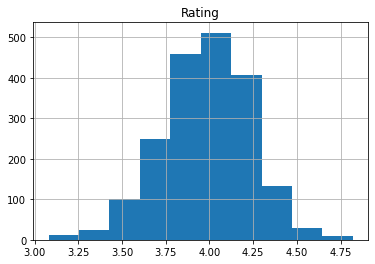

In [265]:
# Analyze Rating's distrbution. 

books_df.hist(column='Rating');

In [266]:
books_df.count()

ISBN                1931
Rating              1931
Price               1931
Pages               1931
Rating Count        1931
Language_Dummy      1931
Size_Dummy          1931
Famous_Dummy        1931
Categories_Dummy    1931
Serie_Dummy         1931
dtype: int64

In [267]:
books_df.describe()

,ISBN,Rating,Price,Pages,Rating Count
count,1.931000e+03,1931.00000,1931.000000,1931.000000,1.931000e+03
mean,9.780564e+12,3.97941,6.394666,388.154842,5.659578e+04
std,4.546815e+08,0.25151,12.991202,264.366944,1.969682e+05
min,9.780006e+12,3.08000,0.000000,21.000000,3.300000e+01
25%,9.780312e+12,3.82000,3.050000,241.000000,4.652500e+03
50%,9.780441e+12,3.99000,4.130000,336.000000,1.234400e+04
75%,9.780752e+12,4.16000,6.390000,448.000000,3.811850e+04
max,9.784770e+12,4.82000,331.870000,3342.000000,4.367341e+06
